In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(U, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [3]:
U

array([[-0.07913928, -0.31822729,  0.86653217,  0.37628494],
       [ 0.38294523,  0.78655287,  0.12002097,  0.46934262],
       [ 0.65640669,  0.02243181,  0.35668848, -0.66437971],
       [ 0.64515128, -0.52873697, -0.32785711,  0.44353889]])

In [4]:
Sigma

array([3.4229581 , 2.02287339, 0.46263157, 0.07935069])

In [5]:
Vt

array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
       [-0.20019867,  0.56209596,  0.37041464,  0.71187191],
       [-0.77847455,  0.3945136 , -0.33259252, -0.3573774 ],
       [-0.5934781 , -0.69164673,  0.36565426,  0.18895901]])

다시 원상복귀 되나 확인

In [6]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

print('\n기존 a값\n',np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]

기존 a값
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고,
4번째 로우는 첫 번째 로우와 같다고 업데이트하겠다.

In [7]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이제 a 행렬은 이전과 다르게 로우 간 관계가 높아졌다.
이 데이터를 SVD로 다시 분해

In [9]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


시그마 값 중 2개가 0으로 변했다.
선형 독립인 로우 벡터의 개수가 2개라는 의미(즉, 행렬의 랭크(Rank가 2이다.)

In [13]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_,3))

print('\n업데이트된 기존a값\n', np.round(a, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]

업데이트된 기존a값
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD는 특이값 중 상위 일부 데이터만 추출해 분해하기 때문에 정확하게 복원할 수는 없지만 원본 행렬에 근사하게 복원할 수 있다.(원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있다.)

In [14]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [16]:
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

In [17]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [19]:
iris = load_iris()
iris_ftrs = iris.data

In [20]:
iris_ftrs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component 2')

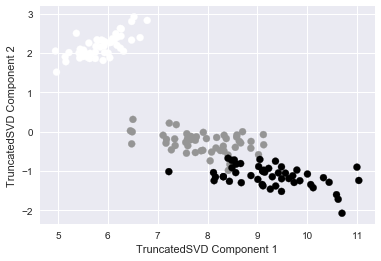

In [31]:
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 0, 'TruncatedSVD Component 2')

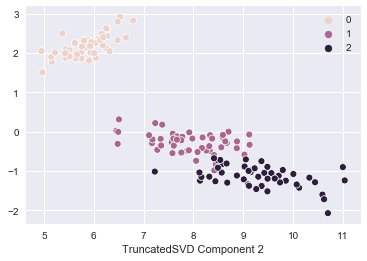

In [29]:
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.xlabel('TruncatedSVD Component 2')

In [34]:
iris_tsvd

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

In [33]:
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'PCA Transformed')

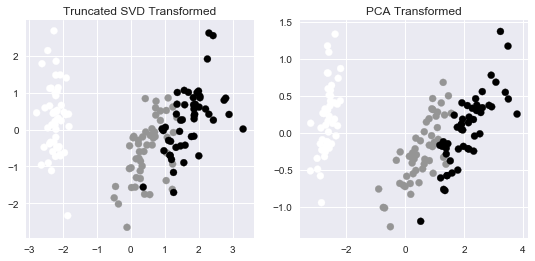

In [48]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_ftrs)
iris_pca = pca.transform(iris_ftrs)

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax[1].scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax[0].set_title('Truncated SVD Transformed')
ax[1].set_title('PCA Transformed')

Text(0.5, 1.0, 'PCA Transformed')

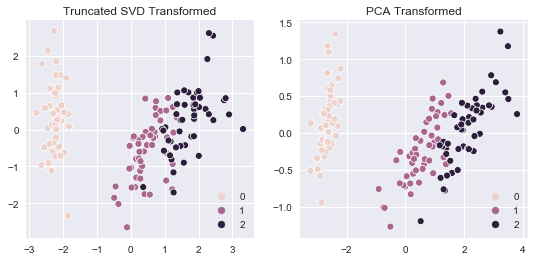

In [46]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.target, ax=ax[0])
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris.target, ax=ax[1])
ax[0].set_title('Truncated SVD Transformed')
ax[1].set_title('PCA Transformed')

모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.
이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다.
하지만,
PCA는 밀집행렬(Dense Matrix)에 대한 변환만 가능하며
SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능하다.

In [52]:
print((iris_pca - iris_tsvd).mean())
print(((pca.components_ - tsvd.components_).mean()))

1.1842378929335003e-16
-0.019926821339753077


In [56]:
print(pca.components_)
print('--------------------------------------------------------')
print(tsvd.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
--------------------------------------------------------
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


NMF

In [57]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

Text(0, 0.5, 'NMF Component 2')

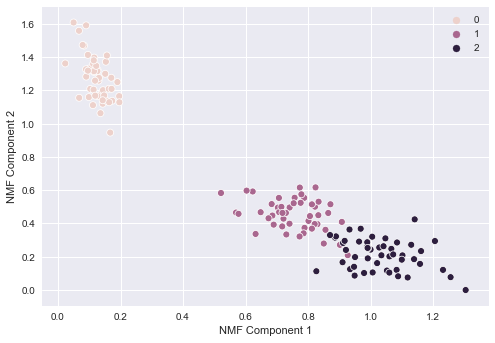

In [58]:
iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
sns.scatterplot(x=iris_nmf[:,0], y=iris_nmf[:,1], hue=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')